<a href="https://colab.research.google.com/github/Luckysolex/Data-Science-Methodologies/blob/master/Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Learning**

Unsupervised learning is a type of machine learning where the model is given data without answers.

* The data has inputs (X)

* But there are no labels or correct outputs (Y)

So, the model is not told what to look for.

## **Analogy:**

It’s like giving a student a box of mixed objects without names and asking them to group similar ones together.
No one tells the student the correct groups — they figure it out by looking at similarities.

## **Clustering**

Clustering is a common type of unsupervised learning.

* The model groups similar data points together

* Items in the same group look more alike than items in different groups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Step 1: Load and Explore the Data

In [2]:
df = pd.read_csv("/content/Instagram visits dataset.csv")

In [3]:
df.head()

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User ID                  2600 non-null   int64  
 1   Instagram visit score    2600 non-null   int64  
 2   Spending_rank(0 to 100)  2600 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 61.1 KB


In [5]:
df.describe()

,User ID,Instagram visit score,Spending_rank(0 to 100)
count,2600.000000,2600.000000,2600.000000
mean,1299.500000,63.323462,42.848408
std,750.699674,26.579760,28.758349
min,0.000000,5.000000,0.940709
25%,649.750000,38.000000,19.452098
50%,1299.500000,72.000000,28.013082
75%,1949.250000,86.000000,72.116945
max,2599.000000,118.000000,107.349821


## Step 2: Data Preparation

In [6]:
df.isnull().sum()

,0
User ID,0
Instagram visit score,0
Spending_rank(0 to 100),0


In [7]:
clustering_features = df[["Instagram visit score", "Spending_rank(0 to 100)"]]
clustering_features.head()

,Instagram visit score,Spending_rank(0 to 100)
0,63,24.050708
1,61,25.223290
2,104,18.528245
3,82,86.890232
4,14,31.492397


The User ID column is not used for clustering because it does not describe behavior or characteristics.

* It is only a label to identify each user

* The numbers have no meaningful relationship

* Including it would confuse the model and distort the results

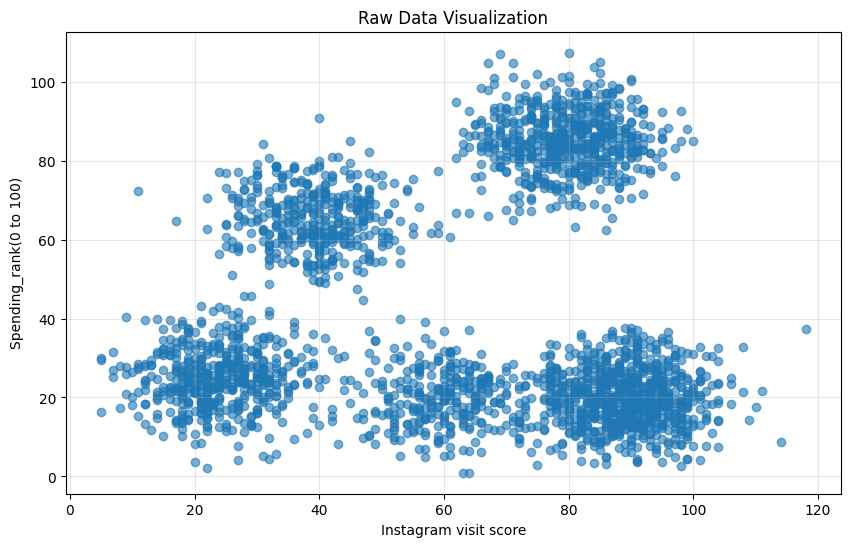

In [8]:
# Visualize the raw data
plt.figure(figsize=(10, 6))
plt.scatter(clustering_features["Instagram visit score"], clustering_features["Spending_rank(0 to 100)"], alpha=0.6)
plt.title("Raw Data Visualization")
plt.xlabel("Instagram visit score")
plt.ylabel("Spending_rank(0 to 100)")
plt.grid(True, alpha=0.3)
plt.show()

**Distinct Clusters**

From the plot, the data points form separate groups, often called clusters.

* The points naturally gather into different blobs

* This suggests the data has clear patterns

* There appear to be about 5 visible clusters

Each cluster likely represents a different type of user behavior

# **STEP 3: FIND OPTIMAL NUMBER OF CLUSTERS - ELBOW METHOD**

**Choosing the Number of Clusters**

When using clustering algorithms like K-Means, you must choose the number of clusters (k) in advance.
But picking this number randomly can give poor results.

**The Elbow Method**

The Elbow Method helps you decide the best value of k.

* You run K-Means with different values of k (for example, 1 to 10)

* For each k, you measure how well the data fits into clusters

* You then plot the results


In [9]:
 # Test different numbers of cluster
 k_range = range(2, 11)
 empty_inertias = []

 for k in k_range:
  # Create KMeans model
     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
     # Fit the model
     kmeans.fit(clustering_features)
     #Store the inertia (within-cluster sum of squares)
     empty_inertias.append(kmeans.inertia_)

     print(f"k={k}: Inertia = {kmeans.inertia_:.2f}")

k=2: Inertia = 2079619.33
k=3: Inertia = 847024.58
k=4: Inertia = 440248.79
k=5: Inertia = 278407.52
k=6: Inertia = 251438.17
k=7: Inertia = 228195.72
k=8: Inertia = 208398.07
k=9: Inertia = 189725.80
k=10: Inertia = 174565.76


**Code Explanation**

**`k_range = range(2, 11)`** : We are trying different values of k from 2 to 10

**`inertias = []`**: Empty list to store the inertia for each value of k

**`for k in k_range:`** Loop through each value of k (number of clusters)

**`kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)`**

* Create a KMeans model with k clusters
* random_state=42: for reproducibility (get same results every time)
* n_init=10: tries 10 different starting points and picks the best

**`kmeans.fit(clustering_features)`**

* This runs the KMeans algorithm on the data (clustering_features)

* It assigns points to clusters and calculates the centers

**`inertias.append(kmeans.inertia_)`**: After fitting, get the inertia (WCSS) and save it in the empty list we created


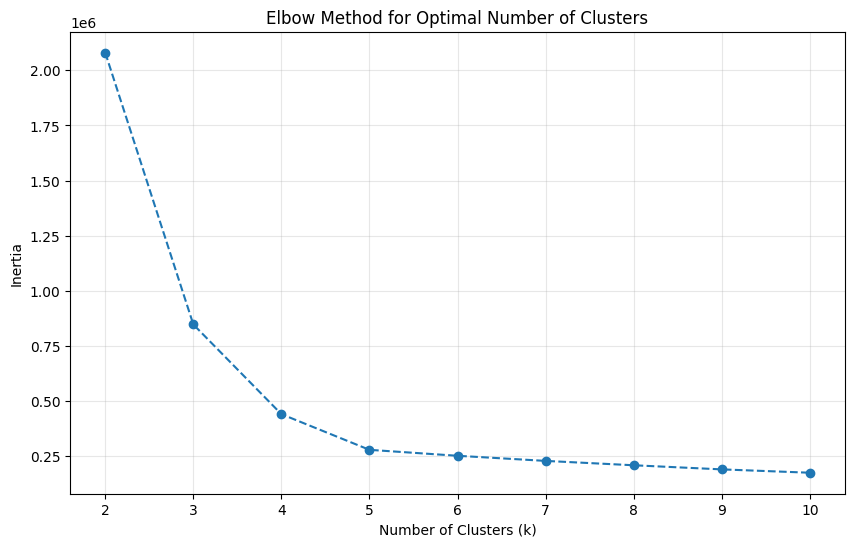

In [10]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, empty_inertias, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True, alpha=0.3)
plt.show()

# **STEP 4: FIND OPTIMAL NUMBER OF CLUSTERS - SILHOUETTE SCORE**

The Silhouette Score is another method to determine the optimal number of clusters, and it's often considered more reliable than the elbow method. Here's how it works:

**The Concept**
The silhouette score measures how well each data point fits within its assigned cluster compared to other clusters. It answers:

"Is this point in the right cluster?"

**Score Interpretation**

Score ranges from -1 to +1

+1: Perfect clustering (point is very close to its cluster, far from others)

0: Point is on the border between clusters

-1: Poor clustering (point might be in the wrong cluster)

In [11]:
silhouette_scores = []

for k in k_range:
  # Create and fit Kmeans model
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  cluster_labels = kmeans.fit_predict(clustering_features)

  # Calculate and store the silhouette score
  silhouette_avg = silhouette_score(clustering_features, cluster_labels)
  silhouette_scores.append(silhouette_avg)

  print(f"k={k}: Silhouette Score = {silhouette_avg:.3f}")

k=2: Silhouette Score = 0.490
k=3: Silhouette Score = 0.595
k=4: Silhouette Score = 0.647
k=5: Silhouette Score = 0.620
k=6: Silhouette Score = 0.539
k=7: Silhouette Score = 0.448
k=8: Silhouette Score = 0.446
k=9: Silhouette Score = 0.384
k=10: Silhouette Score = 0.339


In [12]:
print(cluster_labels[:10])

[0 0 4 5 2 1 5 1 3 9]


**`cluster_labels = kmeans.fit_predict(clustering_features)`**

* Fits the KMeans model to your features (clustering_features) and assigns each data point to a cluster.

* cluster_labels is a list/array showing which cluster each point belongs to.

**`silhouette_avg = silhouette_score(clustering_features, cluster_labels)`**

Computes the silhouette score for that clustering:
* Ranges from -1 to +1

**`silhouette_scores.append(silhouette_avg)`**

Saves the score for that k so we can compare them later

we get a list of silhouette scores for each k, and from that, we can plot them and choose the k with the highest silhouette score(below)


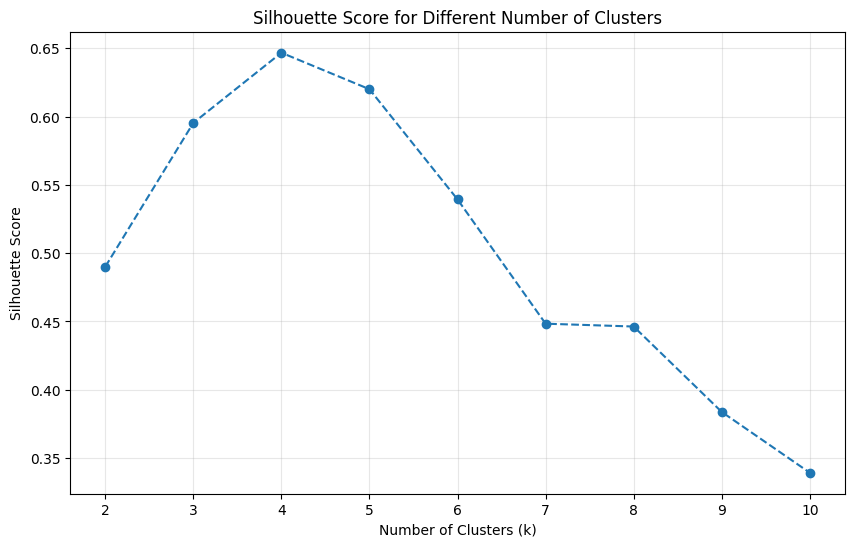

In [13]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Score for Different Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True, alpha=0.3)
plt.show()

# **STEP 5: BUILD THE FINAL K-MEANS MODEL**

In [14]:
# Create the final model
final_kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the model and get cluster labels
cluster_labels = final_kmeans.fit_predict(clustering_features)

Final model chosen by evaluating both the Silhouette score and the Inertia (within-cluster sum of squares)

In [15]:
cluster_labels[:10]

array([0, 0, 0, 2, 3, 2, 2, 2, 1, 0], dtype=int32)

In [16]:
# Add cluster labels to original dataframe
df_clustered = df.copy()
df_clustered['Predicted_Cluster'] = cluster_labels

**df_clustered = df.copy()**

This creates a copy of the original DataFrame df and stores it in a new DataFrame called df_clustered.

This is done to preserve the original data and avoid modifying it directly.

**df_clustered['predicted_cluster'] = cluster_labels**

This line adds a new column called 'predicted_cluster' to df_clustered.

So now, each row in the DataFrame includes:

* The original features from df

* The cluster it was assigned to by the KMeans algorithm

In [17]:
df_clustered['Predicted_Cluster'].unique()

array([0, 2, 3, 1], dtype=int32)

In [18]:
df_clustered.head()

,User ID,Instagram visit score,Spending_rank(0 to 100),Predicted_Cluster
0,0,63,24.050708,0
1,1,61,25.223290,0
2,2,104,18.528245,0
3,3,82,86.890232,2
4,4,14,31.492397,3


## Step 6: Analyze the Clusters

In [19]:
# Cluster distribution
cluster_counts = pd.Series(cluster_labels).value_counts()
print(cluster_counts)

0    1027
2     600
3     573
1     400
Name: count, dtype: int64


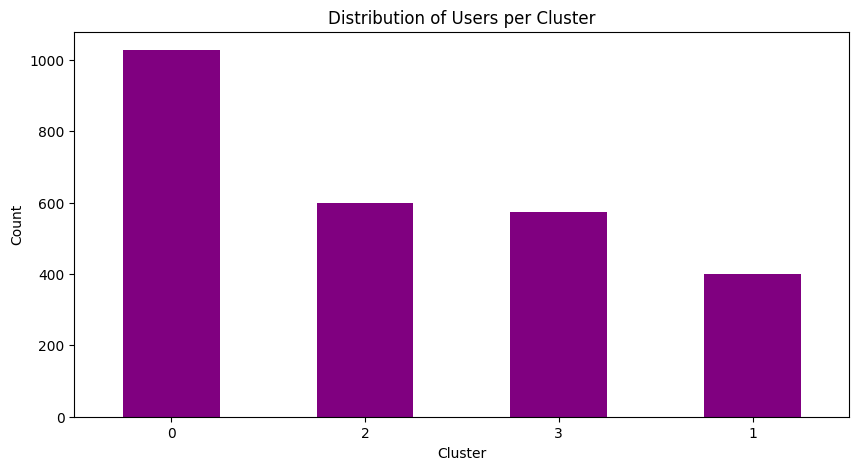

In [20]:
plt.figure(figsize=(10, 5))
cluster_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Users per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [21]:
cluster_characteristics = df_clustered.groupby('Predicted_Cluster')[['Instagram visit score', 'Spending_rank(0 to 100)']].mean()
display(cluster_characteristics)

,Instagram visit score,Spending_rank(0 to 100)
Predicted_Cluster,,
0,83.243427,19.872486
1,39.350000,65.132485
2,79.615000,85.024498
3,27.296684,24.309119


This summarises how different clusters behave based on two features

This helps us:

* Understand the behavior or characteristics of each cluster.

* Give meaningful interpretation or labels to your clusters ("High Spenders", "Low Social Engagement").

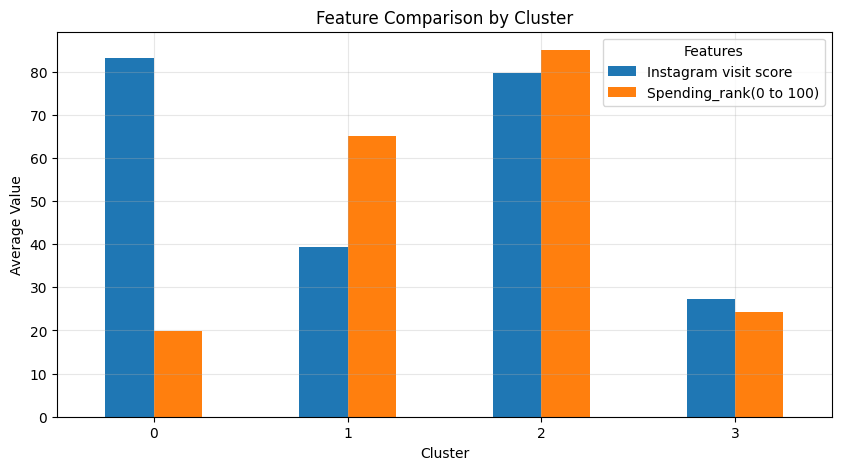

In [22]:
# Plot 4: Feature comparison by cluster
fig, axes = plt.subplots(figsize=(10, 5))
cluster_characteristics.plot(kind='bar', ax=axes)
axes.set_xlabel('Cluster')
axes.set_ylabel('Average Value')
axes.set_title('Feature Comparison by Cluster')
axes.tick_params(axis='x', rotation=0)
axes.legend(title='Features')
axes.grid(True, alpha=0.3)
plt.show()

# **subplot**

A subplot is a way to display multiple plots in a single figure using Matplotlib.

**When to use subplots:**

* Comparing multiple variables side-by-side

* Showing different views of the same data

* Saving multiple plots in a single image

**fig, axes = plt.subplots(figsize=(10, 5))**

**Creates:**

* fig: the entire figure (the whole canvas)

* axes: one subplot (an area inside the figure to draw on)

**cluster_characteristics.plot(kind='bar', ax=axes)**

* Plots a bar chart using the data in cluster_characteristics

* **kind='bar':** this tells it to draw vertical bars

* **ax=axes:** tells it to draw on the axes created above

**axes.tick_params(axis='x', rotation=0)**

 Keeps the x-axis labels horizontal (no rotation). Helps with readability.

 **axes.legend(title='Features')**

 Adds a legend with the title "Features" to show which bar color belongs to which feature


Four distinct customer clusters were identified with the following characteristics:

* Cluster 0: High Instagram Visit, Low Spending

* Cluster 1: Low Instagram Visit, High Spending

* Cluster 2: High Instagram Visit, High Spending

* Cluster 3: Low Instagram Visit, Low Spending


In [23]:
df_clustered[df_clustered['Predicted_Cluster'] == 0].to_csv('cluster_0.csv', index=False)

| Column Name                  | Description                                                                                                            |
| ---------------------------- | ---------------------------------------------------------------------------------------------------------------------- |
| **User ID**                  | A unique identifier for each user in the dataset                                                                       |
| **Instagram visit score**    | A score representing how frequently or actively a user visits Instagram                                                |
| **Spending_rank (0 to 100)** | A ranking score from 0 to 100 showing the user’s spending level, where higher values indicate higher spending behavior |
